In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from datetime import date

In [132]:
plt.rcParams['figure.figsize'] = [10, 5]

In [133]:
df = pd.read_csv('Android_Malware.csv', low_memory = False)
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


Dzielenie na train/test/ walidacje

In [134]:
X_train, X_test_tmp, y_train, y_test_tmp = train_test_split(
    df[df.columns.values[:-1]],
    df[df.columns.values[-1]],
    test_size=0.4, random_state=213)

In [135]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test_tmp,
    y_test_tmp,
    test_size=0.5, random_state=7)

In [136]:
X_validation

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
50272,2588,10.42.0.211-106.39.162.36-57442-80-6,10.42.0.211,57442,106.39.162.36,80.0,6.0,14/06/2017 11:53:01,35650947,7,...,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
327324,69,192.229.173.136-10.42.0.211-443-38918-6,10.42.0.211,38918,192.229.173.136,443.0,6.0,30/06/2017 12:52:29,699937,16,...,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
260658,923,172.217.10.46-10.42.0.211-443-60574-6,10.42.0.211,60574,172.217.10.46,443.0,6.0,27/06/2017 03:32:04,102273543,9,...,8.0,32.0,6013171.0,0.0,6013171.0,6013171.0,24065093.0,1.987377e+07,51359046.0,6420267.0
90290,1076,139.162.2.104-10.42.0.151-80-60541-6,10.42.0.151,60541,139.162.2.104,80.0,6.0,15/06/2017 04:21:33,601732,3,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
173164,1164,10.42.0.151-119.146.74.31-37810-443-6,10.42.0.151,37810,119.146.74.31,443.0,6.0,23/06/2017 10:49:27,646388,2,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98516,432,137.175.31.97-10.42.0.211-80-34301-6,10.42.0.211,34301,137.175.31.97,80.0,6.0,15/06/2017 04:30:12,122,2,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
78057,810,10.42.0.151-31.13.71.1-45802-443-6,10.42.0.151,45802,31.13.71.1,443.0,6.0,14/06/2017 01:16:43,65111047,15,...,8.0,32.0,201829.0,0.0,201829.0,201829.0,64909173.0,0.000000e+00,64909173.0,64909173.0
317331,33,10.42.0.42-88.212.201.197-34237-443-6,88.212.201.197,443,10.42.0.42,34237.0,6.0,14/08/2017 10:40:57,2145,2,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
66837,1104,10.42.0.151-52.84.27.183-35165-443-6,10.42.0.151,35165,52.84.27.183,443.0,6.0,14/06/2017 06:47:58,30799321,2,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [137]:
df = X_train 
df["Label"] = y_train

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213378 entries, 60634 to 183595
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    213378 non-null  int64  
 1   Flow ID                       213378 non-null  object 
 2    Source IP                    213378 non-null  object 
 3    Source Port                  213378 non-null  int64  
 4    Destination IP               213378 non-null  object 
 5    Destination Port             213378 non-null  float64
 6    Protocol                     213378 non-null  float64
 7    Timestamp                    213378 non-null  object 
 8    Flow Duration                213378 non-null  int64  
 9    Total Fwd Packets            213378 non-null  int64  
 10   Total Backward Packets       213378 non-null  int64  
 11  Total Length of Fwd Packets   213378 non-null  float64
 12   Total Length of Bwd Packets  213378 non

jak wygladaja najpopularniejsze wartosci w kazdej z kolumn

In [139]:
for col in df.columns:
    print(f"Top 10 most common values in {col}:")
    print(df[col].value_counts().nlargest(10))
    print()

Top 10 most common values in Unnamed: 0:
130    104
70     102
171    101
5      101
114    100
224    100
122    100
255    100
304    100
115     99
Name: Unnamed: 0, dtype: int64

Top 10 most common values in Flow ID:
8.0.6.4-8.6.0.1-0-0-0                        1278
224.0.0.251-10.42.0.1-5353-5353-17             92
224.0.0.251-10.42.0.211-5353-5353-17           69
10.42.0.255-10.42.0.1-8612-8612-17             65
10.42.0.255-10.42.0.1-8610-8612-17             62
255.255.255.255-0.0.0.0-67-68-17               48
224.0.0.251-10.42.0.151-5353-5353-17           41
157.56.52.45-10.42.0.211-40024-60774-17        36
157.55.130.155-10.42.0.211-40008-60774-17      36
157.55.235.173-10.42.0.211-40024-60774-17      35
Name: Flow ID, dtype: int64

Top 10 most common values in  Source IP:
10.42.0.211        107241
10.42.0.151         71968
10.42.0.42          10870
8.6.0.1              1278
10.42.0.1            1098
202.77.129.150        578
119.146.74.48         527
192.229.173.173       242
6

0.0       89462
1448.0    16150
1460.0    11209
31.0       8435
1418.0     6292
517.0      3333
36.0       2180
1350.0     1864
23.0       1860
1340.0     1815
Name:  Max Packet Length, dtype: int64

Top 10 most common values in  Packet Length Mean:
0.000000      89461
20.666667      2776
36.000000      2119
7.750000       1655
31.000000      1386
66.666667       995
108.250000      946
36.666667       917
6.200000        896
172.000000      764
Name:  Packet Length Mean, dtype: int64

Top 10 most common values in  Packet Length Std:
0.000000      96858
9.237604       4062
17.897858      2945
15.500000      1387
31.754265      1320
23.094011      1239
63.508530      1170
18.475209      1027
233.478509      934
25.980762       911
Name:  Packet Length Std, dtype: int64

Top 10 most common values in  Packet Length Variance:
0.000000       96858
85.333333       4062
320.333333      2945
240.250000      1384
1008.333333     1320
533.333333      1239
4033.333333     1170
341.333333      102

Android_Adware         88343
Android_Scareware      70077
Android_SMS_Malware    40646
Benign                 14312
Name: Label, dtype: int64



ilosc unikalnych wartosci w kazdej z kolumn

In [140]:
with pd.option_context('display.max_rows', None):
    print(df.nunique(dropna=False))

Unnamed: 0                       11016
Flow ID                         136843
 Source IP                        2152
 Source Port                     44516
 Destination IP                   4233
 Destination Port                14374
 Protocol                            5
 Timestamp                       59471
 Flow Duration                  168360
 Total Fwd Packets                 518
 Total Backward Packets            772
Total Length of Fwd Packets       7895
 Total Length of Bwd Packets     17724
 Fwd Packet Length Max            1397
 Fwd Packet Length Min             177
 Fwd Packet Length Mean          24595
 Fwd Packet Length Std           31476
Bwd Packet Length Max             1240
 Bwd Packet Length Min             446
 Bwd Packet Length Mean          26458
 Bwd Packet Length Std           30165
Flow Bytes/s                    115475
 Flow Packets/s                 176661
 Flow IAT Mean                  171639
 Flow IAT Std                    99079
 Flow IAT Max            

rozklad przewidywanej cechy

<AxesSubplot:>

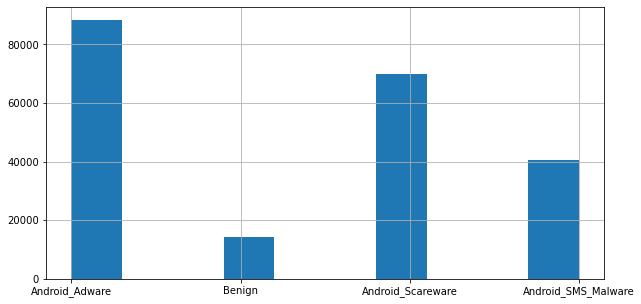

In [141]:
df.iloc[:, -1].hist()

"Adware jest niechcianym oprogramowaniem służącym do wyświetlania reklam na Twoim ekranie". Adware generuje przychody dla swoich twórców dzięki automatycznemu wyświetlaniu internetowych reklam w interfejsie użytkownika danej aplikacji lub w formie okienek wyskakujących podczas procesu instalacji.

Scareware is a type of malware attack that claims to have detected a virus or other issue on a device and directs the user to download or buy malicious software to resolve the problem. Generally speaking, scareware is the gateway to a more intricate cyberattack and not an attack in and of itself.

benign - having no harmful influence or effect

Wszystkie NA są skumulowane we wierszach które można policzyć na palcach jedner ręki można je usunąć

In [142]:
df = df.dropna()

Usunięcie kolumn które mają tylko jedną wartość

In [143]:
col_to_drop = df.columns[df.nunique() <= 1]
df = df.drop(columns = col_to_drop)

Usunięcie kolumn ID, i dwóch kolumn w których są same zera ale zapisane na różne sposoby (int, str, float)

Ta kolumna ma wartości które są int i float, zrzutujemy je na int

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213376 entries, 60634 to 183595
Data columns (total 76 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    213376 non-null  int64  
 1   Flow ID                       213376 non-null  object 
 2    Source IP                    213376 non-null  object 
 3    Source Port                  213376 non-null  int64  
 4    Destination IP               213376 non-null  object 
 5    Destination Port             213376 non-null  float64
 6    Protocol                     213376 non-null  float64
 7    Timestamp                    213376 non-null  object 
 8    Flow Duration                213376 non-null  int64  
 9    Total Fwd Packets            213376 non-null  int64  
 10   Total Backward Packets       213376 non-null  int64  
 11  Total Length of Fwd Packets   213376 non-null  float64
 12   Total Length of Bwd Packets  213376 non

In [145]:
def select_correlated_columns_to_remove(df, corr_treshold):
    cor_lis = []
    cor = df.corr(method="spearman")
    for i, _ in enumerate(cor.columns):
        for j, col_name_to_drop in enumerate(cor.columns):
            if i < j and (abs(cor.iloc[i,j]) > corr_treshold or math.isnan(cor.iloc[i,j])):
                cor_lis.append(col_name_to_drop)
    return cor_lis

In [146]:
cor_lis = select_correlated_columns_to_remove(df, 0.95)
df=df.drop(cor_lis,axis =1 )

In [147]:
def transform_data(X,y):
    df = X
    df["Label"] = y
    df = df.dropna()
    df = df.drop(columns = col_to_drop)
    df = df.drop(columns = ["Unnamed: 0", "Flow ID", " CWE Flag Count", "Fwd Avg Bytes/Bulk"])
    
    
    ip = list(df[' Source IP'])
    ip = [[int(ip[i].split('.')[j]) for j in range(len(ip[i].split('.')))] for i in range(len(ip))]
    ip = pd.DataFrame(ip).fillna(0)
    ip.columns = ['Source IP1','Source IP2',"Source IP3","Source IP4"]
    ip2 = list(df[' Destination IP'])
    ip2 = [[int(ip2[i].split('.')[j]) for j in range(len(ip2[i].split('.')))] for i in range(len(ip2))]
    ip2 = pd.DataFrame(ip2).fillna(0)
    ip2.columns = ['Destination IP1','Destination IP2',"Destination IP3","Destination IP4"]
    ip = pd.concat([ip,ip2], axis = 1)
    df = pd.concat([df.reset_index(),ip],axis = 1).drop('index', axis = 1)
    
    
    mapping_dict = {"Benign": 0,
                "Android_Scareware":1,
                "Android_Adware": 2,
                "Android_SMS_Malware":3}
    
  
    
    df["Label"] = pd.Series(df["Label"]).map(mapping_dict)
    
    one_hot = pd.get_dummies(df[' Protocol'])
    df = df.drop([' Protocol',' Timestamp'," Source IP"," Destination IP",' Down/Up Ratio'],axis = 1)
 
    
    df = df.drop(cor_lis, axis = 1, errors='ignore').astype('double')
    return df.drop("Label", axis=1), df["Label"]

In [148]:
X_test, y_test = transform_data(X_validation, y_validation)
X_train, y_train = transform_data(X_train, y_train)

In [149]:
#le = LabelEncoder()
#df = pd.concat([X_train,X_test], axis = 0)
#len(X_train)

In [150]:
#df[" Source IP"] = le.fit_transform(df[" Source IP"])
#df[" Destination IP"] = le.fit_transform(df[" Destination IP"])
#X_train = df.iloc[0:len(X_train)].astype('double')
#X_test = df.iloc[len(X_train):len(df)].astype('double')

In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213376 entries, 0 to 213375
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Source Port                  213376 non-null  int64  
 1    Destination Port             213376 non-null  float64
 2    Flow Duration                213376 non-null  int64  
 3    Total Fwd Packets            213376 non-null  int64  
 4    Total Backward Packets       213376 non-null  int64  
 5   Total Length of Fwd Packets   213376 non-null  float64
 6    Total Length of Bwd Packets  213376 non-null  float64
 7    Fwd Packet Length Min        213376 non-null  float64
 8    Fwd Packet Length Std        213376 non-null  float64
 9    Bwd Packet Length Min        213376 non-null  float64
 10   Bwd Packet Length Std        213376 non-null  float64
 11  Flow Bytes/s                  213376 non-null  float64
 12   Flow Packets/s               213376 non-nul

In [152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71126 entries, 0 to 71125
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Source Port                  71126 non-null  int64  
 1    Destination Port             71126 non-null  float64
 2    Flow Duration                71126 non-null  int64  
 3    Total Fwd Packets            71126 non-null  int64  
 4    Total Backward Packets       71126 non-null  int64  
 5   Total Length of Fwd Packets   71126 non-null  float64
 6    Total Length of Bwd Packets  71126 non-null  float64
 7    Fwd Packet Length Min        71126 non-null  float64
 8    Fwd Packet Length Std        71126 non-null  float64
 9    Bwd Packet Length Min        71126 non-null  float64
 10   Bwd Packet Length Std        71126 non-null  float64
 11  Flow Bytes/s                  71126 non-null  float64
 12   Flow Packets/s               71126 non-null  float64
 13   

In [159]:
from xgboost import XGBClassifier # Inna paczka niż sklearn!





model=XGBClassifier(random_state=1,
                    learning_rate=0.75, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=15 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7395607794618002

<AxesSubplot:>

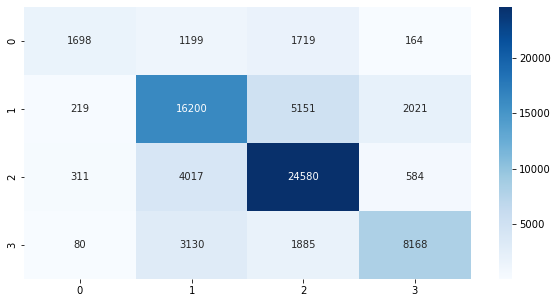

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predicted = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,cmap='Blues', fmt='g')

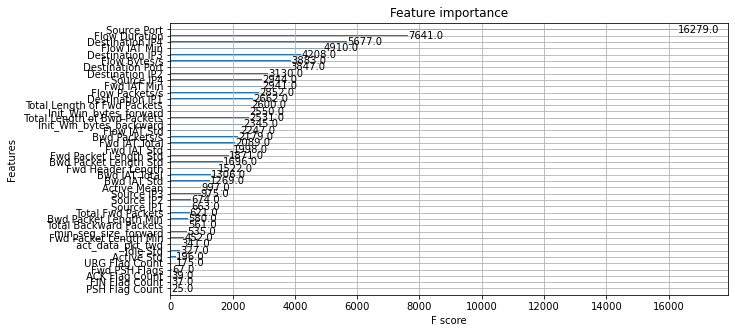

In [83]:
from xgboost import plot_importance
plot_importance(model)
plt.show()